In [1]:
# Note to self: To avoid issues go into anaconda terminal and type "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os
from time import time
from time import sleep

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e85ca75a-7970-4790-be17-678866d2d8a4',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df 
    
    # append data to a csv that is created in my local directory
    if not os.path.isfile(r'C:\Users\seoda\Automating Crypto Website Project\API.csv'):
        df.to_csv(r'C:\Users\seoda\Automating Crypto Website Project\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\seoda\Automating Crypto Website Project\API.csv', mode='a', header=False)
        
    
    

In [5]:
for i in range(333):
    api_runner()
    print('API Runner Completed', i+1)
    sleep(60) #sleep for 1 minute
exit()

API Runner Completed 1
API Runner Completed 2
API Runner Completed 3
API Runner Completed 4
API Runner Completed 5
API Runner Completed 6
API Runner Completed 7
API Runner Completed 8
API Runner Completed 9
API Runner Completed 10
API Runner Completed 11
API Runner Completed 12
API Runner Completed 13
API Runner Completed 14
API Runner Completed 15
API Runner Completed 16
API Runner Completed 17
API Runner Completed 18
API Runner Completed 19
API Runner Completed 20
API Runner Completed 21
API Runner Completed 22
API Runner Completed 23
API Runner Completed 24


KeyboardInterrupt: 

In [2]:
df = pd.read_csv(r'C:\Users\seoda\Automating Crypto Website Project\API.csv')
df.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9588,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.907863e+07,1.907863e+07,NaN,1,NaN,NaN,NaN,2022-06-27T18:17:00.000Z,20770.755253,2.056048e+10,19.6609,0.038046,-1.974162,4.329057,-28.175624,-48.316215,-56.296622,3.962776e+11,42.4571,4.361859e+11,NaN,2022-06-27T18:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-27 18:18:14.435344
1,1,1027,Ethereum,ETH,ethereum,5786,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,1.213232e+08,1.213232e+08,NaN,2,NaN,NaN,NaN,2022-06-27T18:16:00.000Z,1191.221528,1.259203e+10,5.3297,0.081969,-2.129088,8.956919,-33.062564,-59.788005,-65.037047,1.445228e+11,15.4842,1.445228e+11,NaN,2022-06-27T18:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-27 18:18:14.435344
2,2,825,Tether,USDT,tether,35223,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.686726e+10,6.861062e+10,NaN,3,NaN,NaN,NaN,2022-06-27T18:16:00.000Z,0.999079,3.885723e+10,6.8938,0.007850,-0.043707,0.007117,0.016878,-0.108992,-0.153961,6.680571e+10,7.1576,6.854747e+10,NaN,2022-06-27T18:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-27 18:18:14.435344
3,3,3408,USD Coin,USDC,usd-coin,4660,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.580261e+10,5.580261e+10,NaN,4,NaN,NaN,NaN,2022-06-27T18:16:00.000Z,1.000328,3.970600e+09,26.4480,-0.008620,0.027196,0.034555,0.028008,0.037328,0.037684,5.582089e+10,5.9806,5.582089e+10,NaN,2022-06-27T18:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-27 18:18:14.435344
4,4,1839,BNB,BNB,bnb,981,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",165116760.0,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,NaN,2022-06-27T18:16:00.000Z,234.587238,8.545633e+08,5.0074,-0.005460,-0.929393,10.766526,-23.383074,-42.250461,-45.913666,3.830269e+10,4.1037,3.873428e+10,NaN,2022-06-27T18:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-27 18:18:14.435344


In [3]:
len(df.index)

240

In [10]:
#get rid of scienific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x )

In [11]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 
                                'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.53603,-1.53670,4.38265,-27.91837,-48.09378,-56.10306
Ethereum,0.95605,-1.29191,9.59450,-32.62626,-59.53860,-64.76844
Tether,0.00467,-0.03906,0.01367,0.01375,-0.10217,-0.14440
USD Coin,0.00849,0.02584,-0.00327,0.01817,0.03861,0.04984
BNB,0.63507,-0.28649,10.97782,-23.14607,-41.97936,-45.60930
Binance USD,0.00558,0.17043,0.10464,0.05849,0.06545,0.08847
XRP,0.67158,-1.64626,11.88397,-7.63028,-45.15170,-58.64323
Cardano,-0.31122,-2.60036,0.41344,5.14801,-42.70494,-59.12500
Solana,0.58158,-2.61717,12.97495,-9.85727,-60.94214,-64.83992


In [12]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.53603
             quote.USD.percent_change_24h    -1.53670
             quote.USD.percent_change_7d      4.38265
             quote.USD.percent_change_30d   -27.91837
             quote.USD.percent_change_60d   -48.09378
             quote.USD.percent_change_90d   -56.10306
Ethereum     quote.USD.percent_change_1h      0.95605
             quote.USD.percent_change_24h    -1.29191
             quote.USD.percent_change_7d      9.59450
             quote.USD.percent_change_30d   -32.62626
             quote.USD.percent_change_60d   -59.53860
             quote.USD.percent_change_90d   -64.76844
Tether       quote.USD.percent_change_1h      0.00467
             quote.USD.percent_change_24h    -0.03906
             quote.USD.percent_change_7d      0.01367
             quote.USD.percent_change_30d     0.01375
             quote.USD.percent_change_60d    -0.10217
             quote.USD.percent_change_90

In [14]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.53603
            quote.USD.percent_change_24h  -1.53670
            quote.USD.percent_change_7d    4.38265
            quote.USD.percent_change_30d -27.91837
            quote.USD.percent_change_60d -48.09378
            quote.USD.percent_change_90d -56.10306
Ethereum    quote.USD.percent_change_1h    0.95605
            quote.USD.percent_change_24h  -1.29191
            quote.USD.percent_change_7d    9.59450
            quote.USD.percent_change_30d -32.62626
            quote.USD.percent_change_60d -59.53860
            quote.USD.percent_change_90d -64.76844
Tether      quote.USD.percent_change_1h    0.00467
            quote.USD.percent_change_24h  -0.03906
            quote.USD.percent_change_7d    0.01367
            quote.USD.percent_change_30d   0.01375
            quote.USD.percent_change_60d  -0.10217
            quote.USD.percent_change_90d  -0.14440
USD Coin    quote.USD.percent_change_1h    0.00849
            quote.USD.percent_change_24h   0.02584
            quote.USD.percent_change_7d   -0.00327
            quote.USD.percent_change_30d   0.01817
            quote.USD.percent_change_60d   0.03861
            quote.USD.percent_change_90d   0.04984
BNB         quote.USD.percent_change_1h    0.63507
            quote.USD.percent_change_24h  -0.28649
            quote.USD.percent_change_7d   10.97782
            quote.USD.percent_change_30d -23.14607
            quote.USD.percent_change_60d -41.97936
            quote.USD.percent_change_90d -45.60930
Binance USD quote.USD.percent_change_1h    0.00558
            quote.USD.percent_change_24h   0.17043
            quote.USD.percent_change_7d    0.10464
            quote.USD.percent_change_30d   0.05849
            quote.USD.percent_change_60d   0.06545
            quote.USD.percent_change_90d   0.08847
XRP         quote.USD.percent_change_1h    0.67158
            quote.USD.percent_change_24h  -1.64626
            quote.USD.percent_change_7d   11.88397
            quote.USD.percent_change_30d  -7.63028
            quote.USD.percent_change_60d -45.15170
            quote.USD.percent_change_90d -58.64323
Cardano     quote.USD.percent_change_1h   -0.31122
            quote.USD.percent_change_24h  -2.60036
            quote.USD.percent_change_7d    0.41344
            quote.USD.percent_change_30d   5.14801
            quote.USD.percent_change_60d -42.70494
            quote.USD.percent_change_90d -59.12500
Solana      quote.USD.percent_change_1h    0.58158
            quote.USD.percent_change_24h  -2.61717
            quote.USD.percent_change_7d   12.97495
            quote.USD.percent_change_30d  -9.85727
            quote.USD.percent_change_60d -60.94214
            quote.USD.percent_change_90d -64.83992
Dogecoin    quote.USD.percent_change_1h    0.41126
            quote.USD.percent_change_24h  -0.55134
            quote.USD.percent_change_7d   23.24182
            quote.USD.percent_change_30d -11.46006
            quote.USD.percent_change_60d -47.86401
            quote.USD.percent_change_90d -50.00768

In [15]:
df5Count = df5.count()
count = df5Count['values']

In [16]:
index = pd.Index(range(count))


df6 = df5.set_index(index)
df6

,values
0,0.53603
1,-1.53670
2,4.38265
3,-27.91837
4,-48.09378
5,-56.10306
6,0.95605
7,-1.29191
8,9.59450
9,-32.62626


In [17]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.53603
1,Bitcoin,quote.USD.percent_change_24h,-1.53670
2,Bitcoin,quote.USD.percent_change_7d,4.38265
3,Bitcoin,quote.USD.percent_change_30d,-27.91837
4,Bitcoin,quote.USD.percent_change_60d,-48.09378
5,Bitcoin,quote.USD.percent_change_90d,-56.10306
6,Ethereum,quote.USD.percent_change_1h,0.95605
7,Ethereum,quote.USD.percent_change_24h,-1.29191
8,Ethereum,quote.USD.percent_change_7d,9.59450
9,Ethereum,quote.USD.percent_change_30d,-32.62626


In [18]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.53603
1,Bitcoin,quote.USD.percent_change_24h,-1.53670
2,Bitcoin,quote.USD.percent_change_7d,4.38265
3,Bitcoin,quote.USD.percent_change_30d,-27.91837
4,Bitcoin,quote.USD.percent_change_60d,-48.09378
5,Bitcoin,quote.USD.percent_change_90d,-56.10306
6,Ethereum,quote.USD.percent_change_1h,0.95605
7,Ethereum,quote.USD.percent_change_24h,-1.29191
8,Ethereum,quote.USD.percent_change_7d,9.59450
9,Ethereum,quote.USD.percent_change_30d,-32.62626


In [20]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
                                                      'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.53603
1,Bitcoin,24h,-1.53670
2,Bitcoin,7d,4.38265
3,Bitcoin,30d,-27.91837
4,Bitcoin,60d,-48.09378
5,Bitcoin,90d,-56.10306
6,Ethereum,1h,0.95605
7,Ethereum,24h,-1.29191
8,Ethereum,7d,9.59450
9,Ethereum,30d,-32.62626


In [35]:
import seaborn as sns

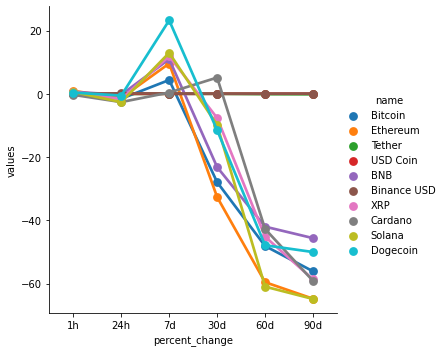

In [22]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')